# **IMPORTS**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Dataset

In [ ]:
df = pd.read_csv('/content/df_final.csv')

In [ ]:
df.drop(['Code'], axis=1, inplace=True )
df.drop(['Entity'], axis=1, inplace=True )

In [ ]:
df

,Year,Recycled,Incinerated,Littered and mismanaged,Landfilled,Annual plastic production between 1950 and 2019,Plastic leakage to aquatic envrionment - Leakage type: Accumulated stock in oceans
0,2000,5783667.0,16980004.0,40635292,92773420.0,213000000,8471748.0
1,2001,6529903.0,18570814.0,42657704,96065190.0,218000000,9153952.0
2,2002,7439750.0,20530800.0,45354524,100721944.0,231000000,9881777.0
3,2003,8383408.0,22507442.0,47831170,104927940.0,241000000,10656836.0
4,2004,9459860.0,24743732.0,50646040,109797350.0,256000000,11481840.0
5,2005,10492602.0,26828640.0,52868510,113526520.0,263000000,12356893.0
6,2006,11721061.0,29326584.0,55713400,118502810.0,280000000,13285542.0
7,2007,13053889.0,32007148.0,58640348,123696620.0,295000000,14270018.0
8,2008,13923892.0,33589484.0,59203064,124444250.0,281000000,15304404.0
9,2009,15146142.0,35934470.0,61048170,127749080.0,288000000,16390133.0




---



**Tratamento geral dos anos e meses**


In [ ]:
#Lista de anos e meses
years = range(2000, 2020)
months = range(1, 13)

#Criar DataFrame expandido
year_month_combinations = [(year, month) for year in years for month in months]
df_expanded = pd.DataFrame(year_month_combinations, columns=['Year', 'Month'])

In [ ]:
#Adicionar a coluna 'Time' que combina ano e mês
df_expanded['Time'] = df_expanded['Year'] + (df_expanded['Month'] - 1) / 12

#Lista de colunas a serem interpoladas
columns_to_interpolate = [
    'Plastic leakage to aquatic envrionment - Leakage type: Accumulated stock in oceans',
    'Annual plastic production between 1950 and 2019',
    'Recycled',
    'Landfilled'
]

In [ ]:
# valores na ordem de 'plastic leakage' , 'Annual production', 'Recycled' e 'Landfilled'
#lista para inserção dos valores de 1999
valor_1999 = [7789544, 208000000, 5037431, 89481650]
i = 0
#Iterar sobre cada coluna e realizar a interpolação
for column in columns_to_interpolate:


    df['December_Value_Previous_Year'] = df[column].shift(1).fillna(valor_1999[i]) # teste de valor3
    i += 1

    # Calcular a diferença anual na quantidade de plástico, exceto para o ano de 2000

    df['Annual_Difference'] = df[column] - df['December_Value_Previous_Year']

    # Adicionar a diferença anual e o valor de dezembro do ano anterior ao DataFrame expandido
    df_expanded = pd.merge(df_expanded, df[['Year', 'December_Value_Previous_Year', 'Annual_Difference']], on='Year', how='left')

    # Calcular o incremento mensal
    df_expanded['Monthly_Increment'] = df_expanded['Annual_Difference'] / 12

    # Adicionar o valor mensal incremental ao valor de dezembro do ano anterior
    df_expanded[column] = df_expanded.groupby('Year')['Monthly_Increment'].cumsum() + df_expanded.groupby('Year')['December_Value_Previous_Year'].transform('first')

    # Converter para inteiro, se necessário
    df_expanded[column] = df_expanded[column].astype(int)

    # Remover colunas auxiliares
    df_expanded.drop(columns=['December_Value_Previous_Year', 'Annual_Difference', 'Monthly_Increment'], inplace=True)

In [ ]:
df_expanded

,Year,Month,Time,Plastic leakage to aquatic envrionment - Leakage type: Accumulated stock in oceans,Annual plastic production between 1950 and 2019,Recycled,Landfilled
0,2000,1,2000.000000,7846394,208416666,5099617,89755964
1,2000,2,2000.083333,7903244,208833333,5161803,90030278
2,2000,3,2000.166667,7960095,209250000,5223990,90304592
3,2000,4,2000.250000,8016945,209666666,5286176,90578906
4,2000,5,2000.333333,8073795,210083333,5348362,90853220
...,...,...,...,...,...,...,...
235,2019,8,2019.583333,29855066,453515726,32195133,171997556
236,2019,9,2019.666667,29993487,455073300,32353606,172457515
237,2019,10,2019.750000,30131907,456630873,32512078,172917473
238,2019,11,2019.833333,30270327,458188446,32670551,173377431




---


# **Plastic Leakege**

---
## **Tratamento**
---



In [ ]:
# Selecionar colunas relevantes para esse condicional
df_plastic = df_expanded[['Year', 'Month', 'Time', 'Plastic leakage to aquatic envrionment - Leakage type: Accumulated stock in oceans']]

In [ ]:
# Renomear colunas para facilitar
df_plastic.columns = ['Year', 'Month', 'Time', 'Plastic_Leakage']

In [ ]:
df_plastic

,Year,Month,Time,Plastic_Leakage
0,2000,1,2000.000000,7846394
1,2000,2,2000.083333,7903244
2,2000,3,2000.166667,7960095
3,2000,4,2000.250000,8016945
4,2000,5,2000.333333,8073795
...,...,...,...,...
235,2019,8,2019.583333,29855066
236,2019,9,2019.666667,29993487
237,2019,10,2019.750000,30131907
238,2019,11,2019.833333,30270327




---




## **Regressão Linear**

###**Treinamento da regressão**


In [ ]:
df = df_plastic

In [ ]:
# Verificar valores ausentes
df.isna().sum()

Year               0
Month              0
Time               0
Plastic_Leakage    0
dtype: int64

separando x e y

In [ ]:
X = df[['Time']]
y = df['Plastic_Leakage']

In [ ]:
df

,Year,Month,Time,Plastic_Leakage
0,2000,1,2000.000000,7846394
1,2000,2,2000.083333,7903244
2,2000,3,2000.166667,7960095
3,2000,4,2000.250000,8016945
4,2000,5,2000.333333,8073795
...,...,...,...,...
235,2019,8,2019.583333,29855066
236,2019,9,2019.666667,29993487
237,2019,10,2019.750000,30131907
238,2019,11,2019.833333,30270327


inicio de treino e teste, separação dos dados

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões para os dados de teste
y_pred = model.predict(X_test)

avaliando R2

In [ ]:
# Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²) do Modelo: {r2}")

Coeficiente de Determinação (R²) do Modelo: 0.9830304775611587


In [ ]:
# Criar uma lista de anos e meses futuros
future_years = np.arange(2020, 2051)
future_months = np.arange(1, 13)
future_time_combinations = [(year, month) for year in future_years for month in future_months]

In [ ]:
#onde inserimos 2019 para obtermos os valores corretos de 2020
future_time_combinations.insert(0, (2019, 12))

In [ ]:
# Criar um DataFrame com essas combinações
future_df_leakage = pd.DataFrame(future_time_combinations, columns=['Year', 'Month'])

In [ ]:
# Criar a coluna 'Time' para as previsões futuras
future_df_leakage['Time'] = future_df_leakage['Year'] + (future_df_leakage['Month'] - 1) / 12

In [ ]:
# Fazer previsões para os valores futuros
future_X = future_df_leakage[['Time']]
future_df_leakage['Predicted_Plastic_Leakage'] = model.predict(future_X)

In [ ]:
# Converter para inteiro
future_df_leakage['Predicted_Plastic_Leakage'] = future_df_leakage['Predicted_Plastic_Leakage'].astype(int)

In [ ]:
# Ajustar a interceptação baseando-se no último valor conhecido
last_known_value = 30502643
model.intercept_ = last_known_value - model.coef_[0] * 2020

# Refazer as previsões com a interceptação ajustada
future_df_leakage['Predicted_Plastic_Leakage_Adjusted'] = model.predict(future_X).astype(int)

###**Resultado da regressão**


In [ ]:
# Exibir as previsões ajustadas
future_df_leakage.head(30)

,Year,Month,Time,Predicted_Plastic_Leakage,Predicted_Plastic_Leakage_Adjusted
0,2019,12,2019.916667,28542968,30408747
1,2020,1,2020.000000,28636864,30502643
2,2020,2,2020.083333,28730760,30596538
3,2020,3,2020.166667,28824656,30690434
4,2020,4,2020.250000,28918552,30784330
5,2020,5,2020.333333,29012448,30878226
6,2020,6,2020.416667,29106344,30972122
7,2020,7,2020.500000,29200239,31066018
8,2020,8,2020.583333,29294135,31159914
9,2020,9,2020.666667,29388031,31253810


In [ ]:
future_df_leakage.tail(30)

,Year,Month,Time,Predicted_Plastic_Leakage,Predicted_Plastic_Leakage_Adjusted
343,2048,7,2048.500000,60749254,62615033
344,2048,8,2048.583333,60843150,62708928
345,2048,9,2048.666667,60937046,62802824
346,2048,10,2048.750000,61030942,62896720
347,2048,11,2048.833333,61124838,62990616
348,2048,12,2048.916667,61218734,63084512
349,2049,1,2049.000000,61312629,63178408
350,2049,2,2049.083333,61406525,63272304
351,2049,3,2049.166667,61500421,63366200
352,2049,4,2049.250000,61594317,63460095


gráfico para visualizar a regressão linear

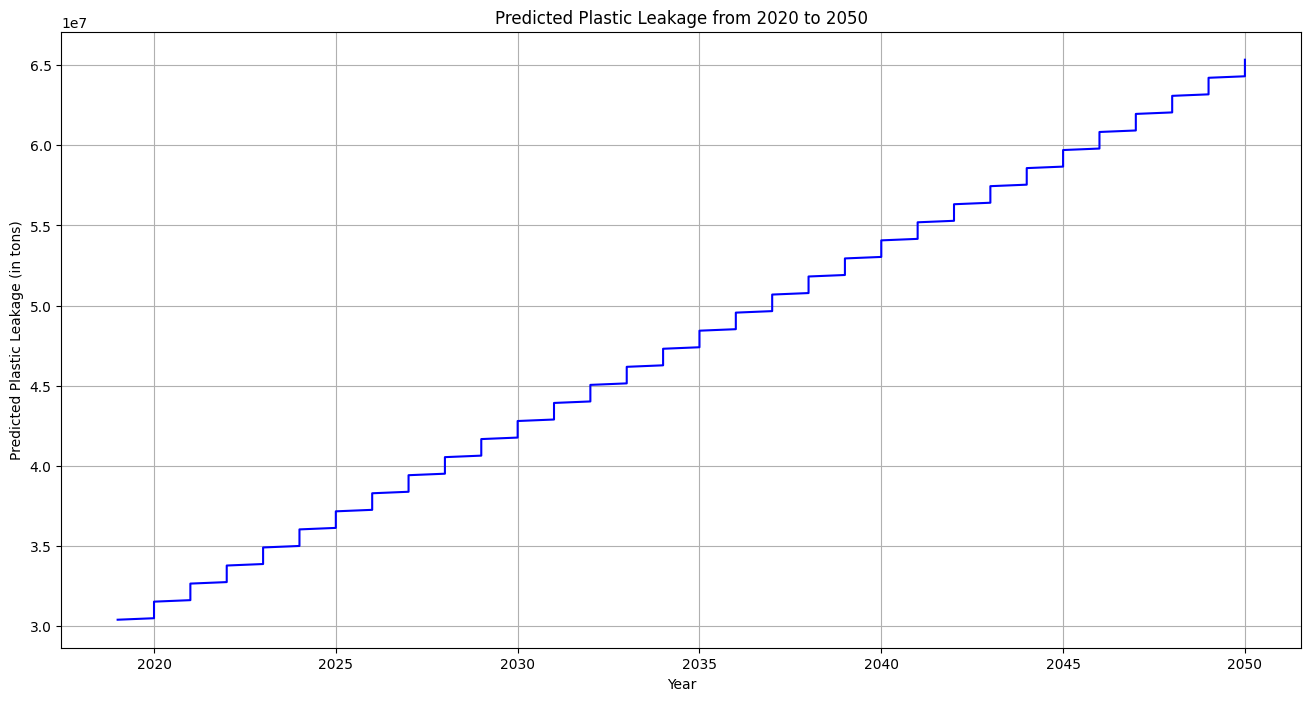

In [ ]:
# Plot predicted plastic leakage
plt.figure(figsize=(16, 8))
plt.plot(future_df_leakage['Year'], future_df_leakage['Predicted_Plastic_Leakage_Adjusted'], color='blue', label='Predicted Plastic Leakage')

plt.title('Predicted Plastic Leakage from 2020 to 2050')
plt.xlabel('Year')
plt.ylabel('Predicted Plastic Leakage (in tons)')

plt.grid(True)

plt.show()




---

# **PRODUCTION**

##**Tratamento**

In [ ]:
# Selecionar colunas relevantes para esse condicional
df_production  = df_expanded[['Year', 'Month', 'Time', 'Annual plastic production between 1950 and 2019']]

In [ ]:
# Renomear colunas para facilitar
df_production.columns = ['Year', 'Month', 'Time', 'Plastic_Production']

In [ ]:
df_production

,Year,Month,Time,Plastic_Production
0,2000,1,2000.000000,208416666
1,2000,2,2000.083333,208833333
2,2000,3,2000.166667,209250000
3,2000,4,2000.250000,209666666
4,2000,5,2000.333333,210083333
...,...,...,...,...
235,2019,8,2019.583333,453515726
236,2019,9,2019.666667,455073300
237,2019,10,2019.750000,456630873
238,2019,11,2019.833333,458188446


##**Regressão Linear**

###**Treinamento da regressão**


In [ ]:
df = df_production

In [ ]:
# Verificar valores ausentes
df.isna().sum()

Year                  0
Month                 0
Time                  0
Plastic_Production    0
dtype: int64

In [ ]:
X = df[['Time']]
y = df['Plastic_Production']

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões para os dados de teste
y_pred = model.predict(X_test)

In [ ]:
# Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²) do Modelo: {r2}")

Coeficiente de Determinação (R²) do Modelo: 0.9737410987518913


In [ ]:
# Criar uma lista de anos e meses futuros
future_years = np.arange(2020, 2051)
future_months = np.arange(1, 13)
future_time_combinations = [(year, month) for year in future_years for month in future_months]

In [ ]:
#onde inserimos 2019 para obtermos os valores corretos de 2020
future_time_combinations.insert(0, (2019, 12))

In [ ]:
# Criar um DataFrame com essas combinações
future_df_Production = pd.DataFrame(future_time_combinations, columns=['Year', 'Month'])

In [ ]:
# Criar a coluna 'Time' para as previsões futuras
future_df_Production['Time'] = future_df_Production['Year'] + (future_df_Production['Month'] - 1) / 12

In [ ]:
# Fazer previsões para os valores futuros
future_X = future_df_Production[['Time']]
future_df_Production['Predicted_Plastic_Production'] = model.predict(future_X)

In [ ]:
# Converter para inteiro
future_df_Production['Predicted_Plastic_Production'] = future_df_Production['Predicted_Plastic_Production'].astype(int)

In [ ]:
# Ajustar a interceptação baseando-se no último valor conhecido
last_known_value = 460848472
model.intercept_ = last_known_value - model.coef_[0] * 2020

# Refazer as previsões com a interceptação ajustada
future_df_Production['Predicted_Plastic_Production_Adjusted'] = model.predict(future_X).astype(int)

###**Resultado da regressão**


In [ ]:
# Exibir as previsões ajustadas
future_df_Production.head(30)

,Year,Month,Time,Predicted_Plastic_Production,Predicted_Plastic_Production_Adjusted
0,2019,12,2019.916667,432728023,459839914
1,2020,1,2020.000000,433736580,460848472
2,2020,2,2020.083333,434745138,461857029
3,2020,3,2020.166667,435753695,462865586
4,2020,4,2020.250000,436762252,463874143
5,2020,5,2020.333333,437770809,464882700
6,2020,6,2020.416667,438779367,465891258
7,2020,7,2020.500000,439787924,466899815
8,2020,8,2020.583333,440796481,467908372
9,2020,9,2020.666667,441805038,468916929


In [ ]:
future_df_Production.tail(30)

,Year,Month,Time,Predicted_Plastic_Production,Predicted_Plastic_Production_Adjusted
343,2048,7,2048.500000,778663159,805775050
344,2048,8,2048.583333,779671716,806783608
345,2048,9,2048.666667,780680274,807792165
346,2048,10,2048.750000,781688831,808800722
347,2048,11,2048.833333,782697388,809809279
348,2048,12,2048.916667,783705945,810817837
349,2049,1,2049.000000,784714503,811826394
350,2049,2,2049.083333,785723060,812834951
351,2049,3,2049.166667,786731617,813843508
352,2049,4,2049.250000,787740174,814852066


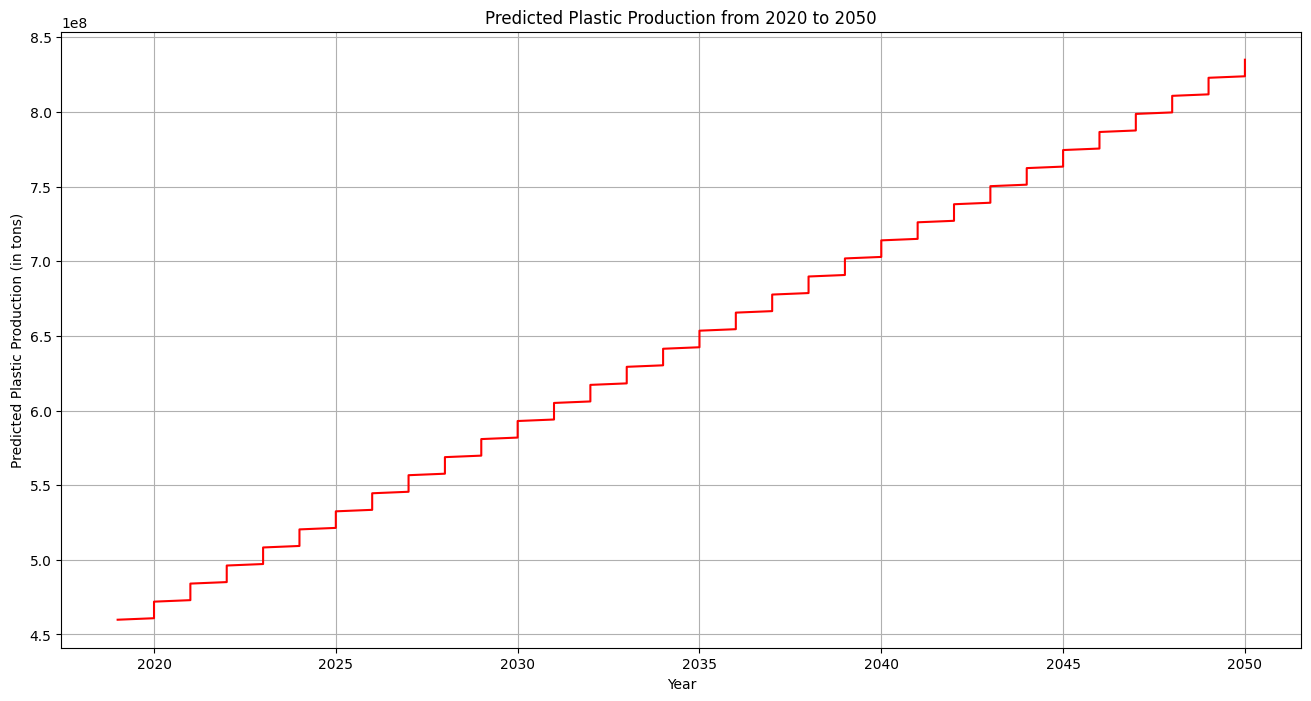

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(future_df_Production['Year'], future_df_Production['Predicted_Plastic_Production_Adjusted'], color='red', label='Predicted Plastic Production')

plt.title('Predicted Plastic Production from 2020 to 2050')
plt.xlabel('Year')
plt.ylabel('Predicted Plastic Production (in tons)')

plt.grid(True)

plt.show()


---

# **LANDFILLED**

##**Tratamento**

In [ ]:
# Selecionar colunas relevantes para esse condicional
df_landfilled  = df_expanded[['Year', 'Month', 'Time', 'Landfilled']]

In [ ]:
df_landfilled

,Year,Month,Time,Landfilled
0,2000,1,2000.000000,89755964
1,2000,2,2000.083333,90030278
2,2000,3,2000.166667,90304592
3,2000,4,2000.250000,90578906
4,2000,5,2000.333333,90853220
...,...,...,...,...
235,2019,8,2019.583333,171997556
236,2019,9,2019.666667,172457515
237,2019,10,2019.750000,172917473
238,2019,11,2019.833333,173377431


##**Regressão Linear**

###**Treinamento da regressão**


In [ ]:
df = df_landfilled

In [ ]:
# Verificar valores ausentes
df.isna().sum()

Year          0
Month         0
Time          0
Landfilled    0
dtype: int64

In [ ]:
X = df[['Time']]
y = df['Landfilled']

In [ ]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões para os dados de teste
y_pred = model.predict(X_test)

In [ ]:
# Avaliar o desempenho do modelo
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinação (R²) do Modelo: {r2}")

Coeficiente de Determinação (R²) do Modelo: 0.9986988266695817


In [ ]:
# Criar uma lista de anos e meses futuros
future_years = np.arange(2020, 2051)
future_months = np.arange(1, 13)
future_time_combinations = [(year, month) for year in future_years for month in future_months]

In [ ]:
# Onde inserimos 2019 para obtermos os valores corretos de 2020
future_time_combinations.insert(0, (2019, 12))

In [ ]:
# Criar um DataFrame com essas combinações
future_df_Landfilled = pd.DataFrame(future_time_combinations, columns=['Year', 'Month'])

In [ ]:
# Criar a coluna 'Time' para as previsões futuras
future_df_Landfilled['Time'] = future_df_Landfilled['Year'] + (future_df_Landfilled['Month'] - 1) / 12

In [ ]:
# Fazer previsões para os valores futuros
future_X = future_df_Landfilled[['Time']]
future_df_Landfilled['Predicted_Plastic_Landfilled'] = model.predict(future_X)

In [ ]:
# Converter para inteiro
future_df_Landfilled['Predicted_Plastic_Landfilled'] = future_df_Landfilled['Predicted_Plastic_Landfilled'].astype(int)

In [ ]:
# Ajustar a interceptação baseando-se no último valor conhecido
last_known_value = 174184279
model.intercept_ = last_known_value - model.coef_[0] * 2020

# Refazer as previsões com a interceptação ajustada
future_df_Landfilled['Predicted_Plastic_Landfilled_Adjusted'] = model.predict(future_X).astype(int)

###**Resultado da regressão**


In [ ]:
# Exibir as previsões ajustadas
future_df_Landfilled.head(30)

,Year,Month,Time,Predicted_Plastic_Landfilled,Predicted_Plastic_Landfilled_Adjusted
0,2019,12,2019.916667,171673332,173837389
1,2020,1,2020.000000,172020221,174184279
2,2020,2,2020.083333,172367111,174531168
3,2020,3,2020.166667,172714001,174878058
4,2020,4,2020.250000,173060890,175224947
5,2020,5,2020.333333,173407780,175571837
6,2020,6,2020.416667,173754670,175918727
7,2020,7,2020.500000,174101559,176265616
8,2020,8,2020.583333,174448449,176612506
9,2020,9,2020.666667,174795339,176959396


In [ ]:
future_df_Landfilled.tail(30)

,Year,Month,Time,Predicted_Plastic_Landfilled,Predicted_Plastic_Landfilled_Adjusted
343,2048,7,2048.500000,290656486,292820543
344,2048,8,2048.583333,291003375,293167432
345,2048,9,2048.666667,291350265,293514322
346,2048,10,2048.750000,291697155,293861212
347,2048,11,2048.833333,292044044,294208101
348,2048,12,2048.916667,292390934,294554991
349,2049,1,2049.000000,292737823,294901881
350,2049,2,2049.083333,293084713,295248770
351,2049,3,2049.166667,293431603,295595660
352,2049,4,2049.250000,293778492,295942550


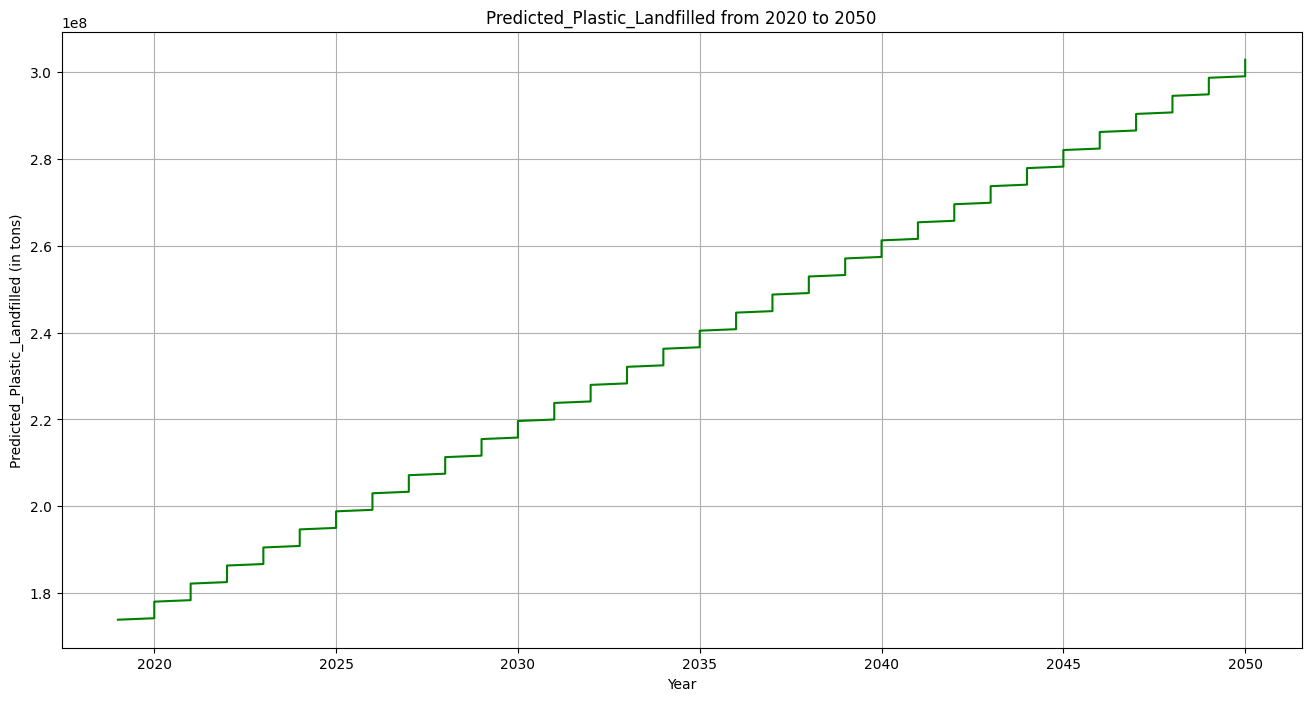

In [ ]:

plt.figure(figsize=(16, 8))
plt.plot(future_df_Landfilled['Year'], future_df_Landfilled['Predicted_Plastic_Landfilled_Adjusted'], color='green', label='Predicted_Plastic_Landfilled')


plt.title('Predicted_Plastic_Landfilled from 2020 to 2050')
plt.xlabel('Year')
plt.ylabel('Predicted_Plastic_Landfilled (in tons)')


plt.grid(True)


plt.show()




---



# **Junção dos resultados**

## **Tratamento**

In [ ]:
# Tirando colunas desnecessárias

future_df_leakage.drop(['Predicted_Plastic_Leakage'], axis=1, inplace=True )
future_df_leakage.drop(['Time'], axis=1, inplace=True )

In [ ]:
# Adicionando as predições dos outros dataframes ao primeiro, em suas respectivas colunas

future_df_leakage['Annual Production'] = future_df_Production['Predicted_Plastic_Production_Adjusted']
future_df_leakage['Landfilled Plastic'] = future_df_Landfilled['Predicted_Plastic_Landfilled_Adjusted']

In [ ]:
# Ajustando os nomes das colunas

future_df_leakage.columns = ['Year', 'Month', 'Plastic Leakage (Ocean)', 'Annual Plastic Production', 'Landfilled Plastic']

In [ ]:
# Criando colunas percentuais dos valores de vazamento de plástico e reciclagem, em relação ao total de produção de plástico (100%)

future_df_leakage['Plastic Leakage Percentage (%)'] = (future_df_leakage['Plastic Leakage (Ocean)'] / future_df_leakage['Annual Plastic Production']) * 100
future_df_leakage['Landfilled Plastic Percentage (%)'] = (future_df_leakage['Landfilled Plastic'] / future_df_leakage['Annual Plastic Production']) * 100

# **RESULTADO FINAL**

In [ ]:
future_df_leakage

,Year,Month,Plastic Leakage (Ocean),Annual Plastic Production,Landfilled Plastic,Plastic Leakage Percentage (%),Landfilled Plastic Percentage (%)
0,2019,12,30408747,459839914,173837389,6.612899,37.803893
1,2020,1,30502643,460848472,174184279,6.618801,37.796432
2,2020,2,30596538,461857029,174531168,6.624677,37.789003
3,2020,3,30690434,462865586,174878058,6.630528,37.781607
4,2020,4,30784330,463874143,175224947,6.636354,37.774243
...,...,...,...,...,...,...,...
368,2050,8,64962429,830988982,301492784,7.817484,36.281201
369,2050,9,65056325,831997539,301839674,7.819293,36.278914
370,2050,10,65150221,833006096,302186564,7.821098,36.276633
371,2050,11,65244117,834014653,302533453,7.822898,36.274357


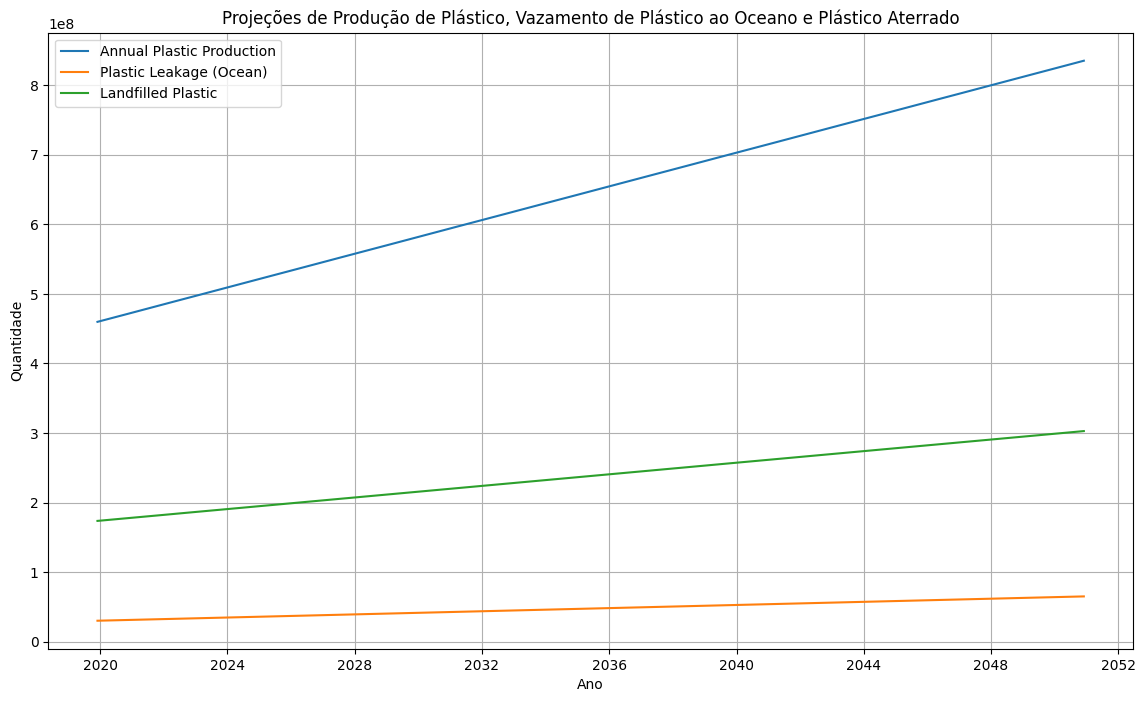

In [ ]:
# Criar a coluna 'Date' para plotagem
future_df_leakage['Date'] = pd.to_datetime(future_df_leakage[['Year', 'Month']].assign(DAY=1))

# Configurar o gráfico
plt.figure(figsize=(14, 8))

# Plotar cada série temporal
plt.plot(future_df_leakage['Date'], future_df_leakage['Annual Plastic Production'], label='Annual Plastic Production')
plt.plot(future_df_leakage['Date'], future_df_leakage['Plastic Leakage (Ocean)'], label='Plastic Leakage (Ocean)')
plt.plot(future_df_leakage['Date'], future_df_leakage['Landfilled Plastic'], label='Landfilled Plastic')

# Adicionar títulos e legendas
plt.title('Projeções de Produção de Plástico, Vazamento de Plástico ao Oceano e Plástico Aterrado')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.show()

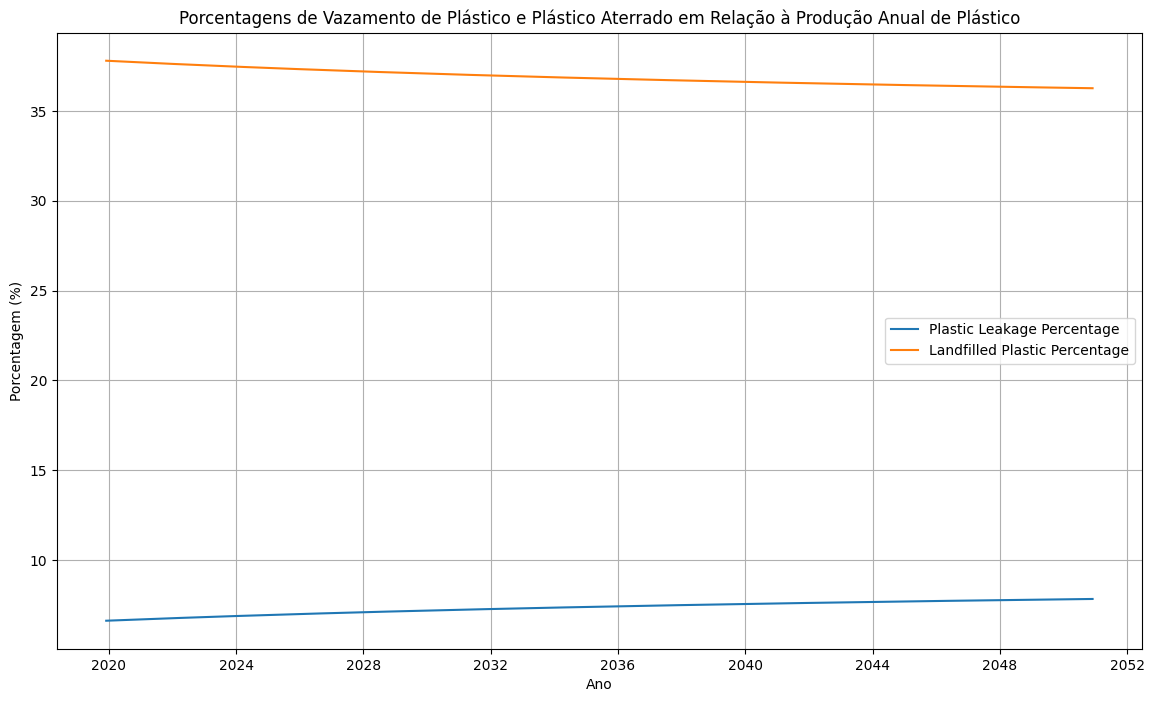

In [ ]:
# Configurar o gráfico
plt.figure(figsize=(14, 8))

# Plotar cada série temporal de porcentagens
plt.plot(future_df_leakage['Date'], future_df_leakage['Plastic Leakage Percentage (%)'], label='Plastic Leakage Percentage')
plt.plot(future_df_leakage['Date'], future_df_leakage['Landfilled Plastic Percentage (%)'], label='Landfilled Plastic Percentage')

# Adicionar títulos e legendas
plt.title('Porcentagens de Vazamento de Plástico e Plástico Aterrado em Relação à Produção Anual de Plástico')
plt.xlabel('Ano')
plt.ylabel('Porcentagem (%)')
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.show()